# Plotting the NASA PGA data on an actual map

Last time we looked at the NASA PGA data, we only plotted the data itself but didn't project it onto a map. This notebook will show you how to do that.

In this exercise we will plot the Global Earthquake Hazard Distribution - Peak Ground Acceleration 1976-2002. This data was collected by NASA and you can download it for free.

[Download Here.](http://sedac.ciesin.columbia.edu/data/set/ndh-earthquake-distribution-peak-ground-acceleration/data-download#close)

You will need to unzip the file you download.

(You don't need to do this step if you already downloaded the data.)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Import and mask the data

In the first lesson on heat maps we talked about importing the data and masking it, here we do that step again.

In [3]:
data_location = '../data/gdpga/gdpga.asc'
    
df = pd.read_csv(data_location, skiprows=6, delim_whitespace=True, names=np.arange(8640))
masked_data = np.ma.masked_where(df.values<0,df.values)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,8630,8631,8632,8633,8634,8635,8636,8637,8638,8639
0,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


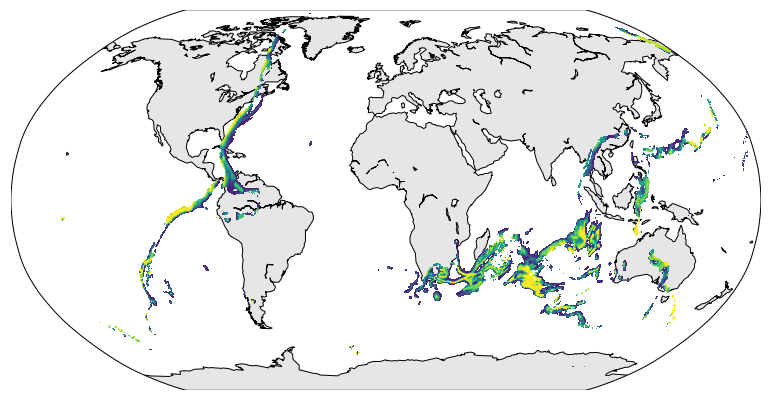

In [5]:
fig, ax = plt.subplots(1, figsize=(15,7))

m = Basemap(projection='robin'
            , lon_0=0
        , resolution='c'       # the level of resolution to render the drawings, see documentation for more details
        , area_thresh=10000    # the area, in meters, to not plot things 
                               # (so if an island is less than 10k meters it won't be plotted)
        , ax=ax)               # the axes object to plot on that was created previously

m.drawcoastlines()             
m.fillcontinents(color='0.9'   # in matplotlib grayscale can be defined by a number between 0 and 1
                 , lake_color='white' # color can also be a name
                 , zorder=0)   # zorder is the layer which to draw.

lons = np.linspace(-180, 180, 8640)
lats = np.linspace(-90, 90, 3432)

lons, lats = np.meshgrid(lons, lats)

m.pcolormesh(lons, lats, masked_data, vmin=0, vmax=10, zorder=20, latlon=True)

# Well that looks wrong, What happened?

We know what this map should look like since NASA tells us:

![actual map](http://i.imgur.com/JlORDk2.png)

## So what went wrong?

1. it looks like the latitude coordinates are flipped.
2. it looks stretched across the latitude axis

Going to the [NASA website](http://sedac.ciesin.columbia.edu/data/set/ndh-earthquake-distribution-peak-ground-acceleration/metadata) we see that it lists the bounding coordinates as:

    Bounding Coordinates:
    West Bounding Coordinate: -180.000000
    East Bounding Coordinate: 180.000000
    North Bounding Coordinate: 85.000000
    South Bounding Coordinate: -58.000000
    
so flipping the sign on the `lats = np.linspace` and changing the bounding size should do the trick.

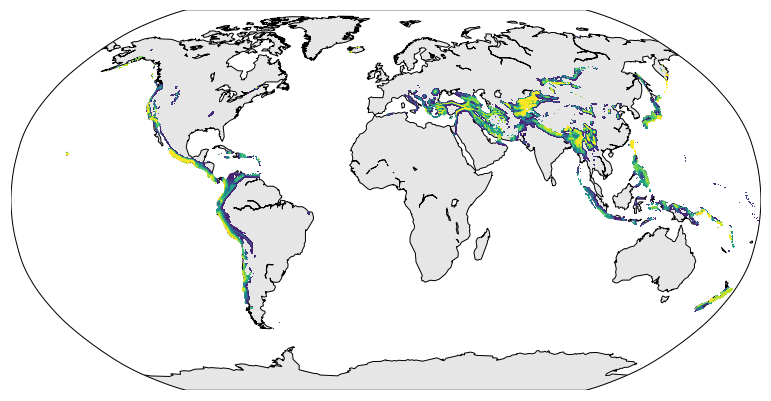

In [6]:
fig, ax = plt.subplots(1, figsize=(15,7))

m = Basemap(projection='robin' # the projection you want to use, many are supported, this one is mercator
       ,lon_0=0
        , resolution='c'       # the level of resolution to render the drawings, see documentation for more details
        , area_thresh=10000    # the area, in meters, to not plot things 
                               # (so if an island is less than 10k meters it won't be plotted)
        , ax=ax)               # the axes object to plot on that was created previously

m.drawcoastlines()             
m.fillcontinents(color='0.9'   # in matplotlib grayscale can be defined by a number between 0 and 1
                 , lake_color='white' # color can also be a name
                 , zorder=0)   # zorder is the layer which to draw.


lons = np.linspace(-180, 180, 8640)
lats = np.linspace(85, -58, 3432)

lons, lats = np.meshgrid(lons, lats)

m.pcolormesh(lons, lats, masked_data, vmin=0, vmax=10, zorder=20, latlon=True, alpha=0.85)

# Yay it worked!

But what if we want a different colormap? Or a colorbar to indicate the values?

Matplotlib has a reference for colormaps:

http://matplotlib.org/examples/color/colormaps_reference.html

This is a great link to remember because you will use it a lot.

Using the code here we can show below how to set a different colormap and create a colorbar.

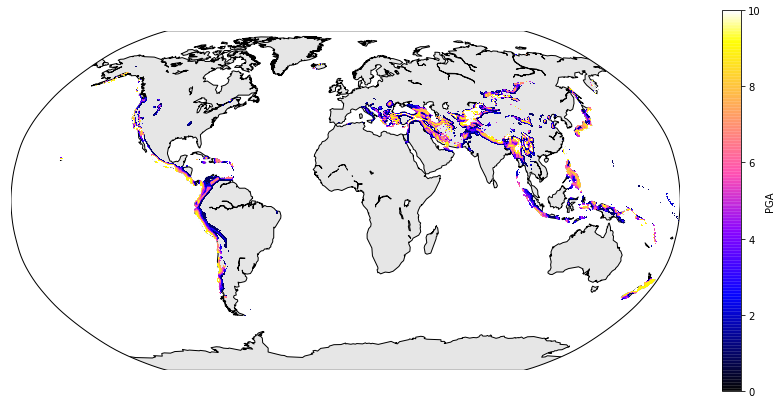

In [7]:
fig, ax = plt.subplots(1, figsize=(15,7))

m = Basemap(projection='robin' # the projection you want to use, many are supported, this one is mercator
       ,lon_0=0
        , resolution='c'       # the level of resolution to render the drawings, see documentation for more details
        , area_thresh=10000    # the area, in meters, to not plot things 
                               # (so if an island is less than 10k meters it won't be plotted)
        , ax=ax)               # the axes object to plot on that was created previously

m.drawcoastlines()             
m.fillcontinents(color='0.9'   # in matplotlib grayscale can be defined by a number between 0 and 1
                 , lake_color='white' # color can also be a name
                 , zorder=0)   # zorder is the layer which to draw.


lons = np.linspace(-180, 180, 8640)
lats = np.linspace(85, -58, 3432)

lons, lats = np.meshgrid(lons, lats)

cbar = m.pcolormesh(lons, lats, masked_data, vmin=0, vmax=10, zorder=20, latlon=True, alpha=0.85, cmap='gnuplot2')

fig.colorbar(cbar, label='PGA')

# Looks like it worked!

But You don't always have data that is shaped just for you by NASA. Sometimes our data is calculated from an earthquake catalog. Next notebook we will start with the ANSS catalog, calculate some statistics, and grid them like the NASA PGA catalog data and then plot them on a map.